# Classification

* This algorithm is used for classification and regression.

* Select random samples from a given dataset. Construct a decision tree for each sample and get a prediction result from each decision tree. Perform a vote for each predicted result. Select the prediction result with the most votes as the final prediction.

In [54]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn import tree
from sklearn.metrics import classification_report,confusion_matrix,mean_absolute_error,mean_squared_error

In [2]:
#Loading the dataset
data = pd.read_csv('D:\\SLIIT\\3rd year 2nd sem\\Information Retrieval and Web Analytics\\Coding\\Maternal Health Risk Data Set.csv')
data.head(10)

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.00,98.0,86,high risk
1,35,140,90,13.00,98.0,70,high risk
2,29,90,70,8.00,100.0,80,high risk
3,30,140,85,7.00,98.0,70,high risk
4,35,120,60,6.10,98.0,76,low risk
5,23,140,80,7.01,98.0,70,high risk
6,23,130,70,7.01,98.0,78,mid risk
7,35,85,60,11.00,102.0,86,high risk
8,32,120,90,6.90,98.0,70,mid risk
9,42,130,80,18.00,98.0,70,high risk


In [3]:
#Exploring the dataset
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1014.0,29.871795,13.474386,10.0,19.0,26.0,39.0,70.0
SystolicBP,1014.0,113.198225,18.403913,70.0,100.0,120.0,120.0,160.0
DiastolicBP,1014.0,76.460552,13.885796,49.0,65.0,80.0,90.0,100.0
BS,1014.0,8.725986,3.293532,6.0,6.9,7.5,8.0,19.0
BodyTemp,1014.0,98.665089,1.371384,98.0,98.0,98.0,98.0,103.0
HeartRate,1014.0,74.301775,8.088702,7.0,70.0,76.0,80.0,90.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


In [5]:
data.isna().sum()

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64

* **suptitle** - Name of the plot

Text(0.5, 1.05, 'Scatterplot and histogram of variables color coded by risk level')

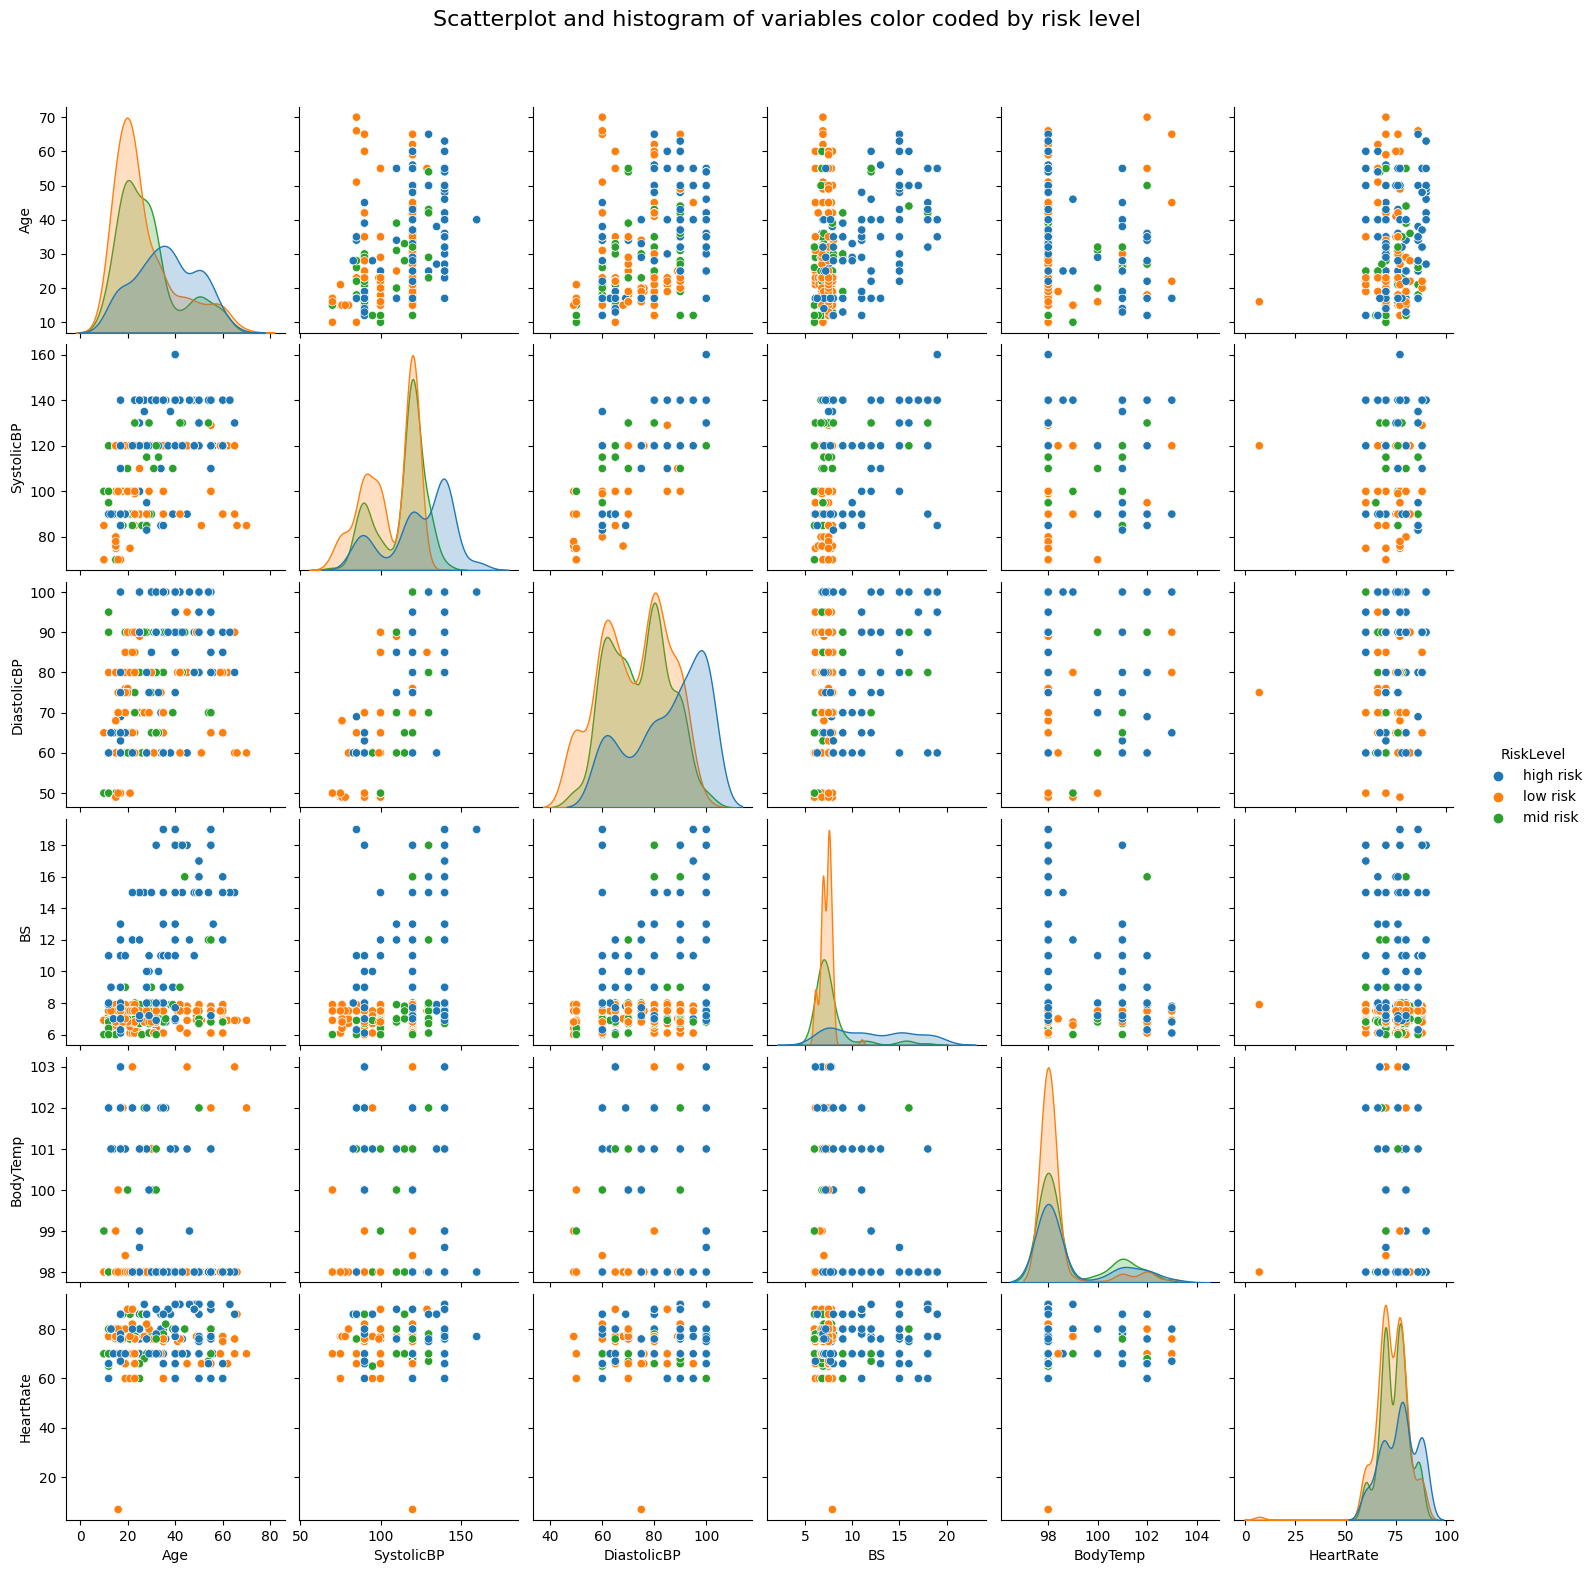

In [6]:
g = sns.pairplot(data,hue='RiskLevel') #hue - Variable in data to map plot aspects of different colours.
g.fig.suptitle("Scatterplot and histogram of variables color coded by risk level",fontsize=16,y=1.05)

## Data Preprocessing

In [7]:
#Checking the number of classes in the RiskLevel column
data['RiskLevel'].unique()

array(['high risk', 'low risk', 'mid risk'], dtype=object)

### Converting the class values into numbers

* **high risk - 2**
* **medium risk - 1**
* **low risk - 0**

In [8]:
data['RiskLevel'] = data['RiskLevel'].replace('low risk',0).replace('mid risk',1).replace('high risk',2)

In [9]:
y = data['RiskLevel']
x = data.drop(['RiskLevel'],axis=1)
y

0       2
1       2
2       2
3       2
4       0
       ..
1009    2
1010    2
1011    2
1012    2
1013    1
Name: RiskLevel, Length: 1014, dtype: int64

In [10]:
x

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
0,25,130,80,15.0,98.0,86
1,35,140,90,13.0,98.0,70
2,29,90,70,8.0,100.0,80
3,30,140,85,7.0,98.0,70
4,35,120,60,6.1,98.0,76
...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80
1010,55,120,90,18.0,98.0,60
1011,35,85,60,19.0,98.0,86
1012,43,120,90,18.0,98.0,70


In [11]:
#Splitting the dataset into testing and training
SEED = 42
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=SEED)

* **n_estimators parameter** - The number of trees in the forest.

* **max_depth** - The maximum depth of the tree.

In [12]:
#Building the model
rfc = RandomForestClassifier(n_estimators=3,max_depth=2,random_state=SEED)

In [13]:
#Fitting the model
rfc.fit(x_train,y_train)

RandomForestClassifier(max_depth=2, n_estimators=3, random_state=42)

In [14]:
# Making predictions
y_pred = rfc.predict(x_test)

DecisionTreeClassifier(max_depth=2, max_features='auto',
                       random_state=1608637542)


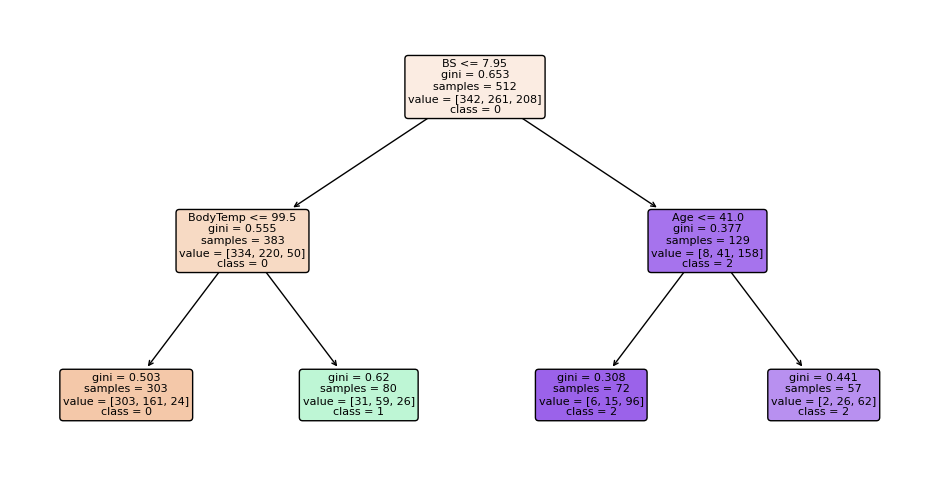

DecisionTreeClassifier(max_depth=2, max_features='auto',
                       random_state=1273642419)


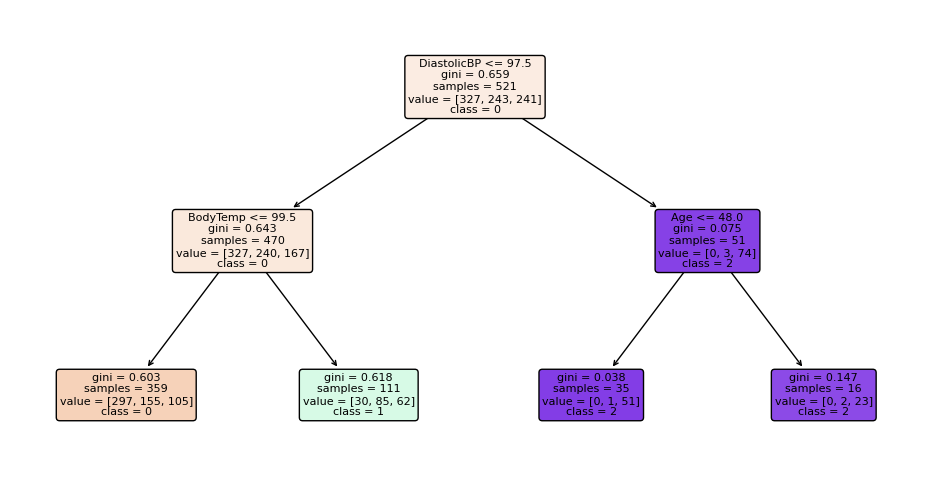

DecisionTreeClassifier(max_depth=2, max_features='auto',
                       random_state=1935803228)


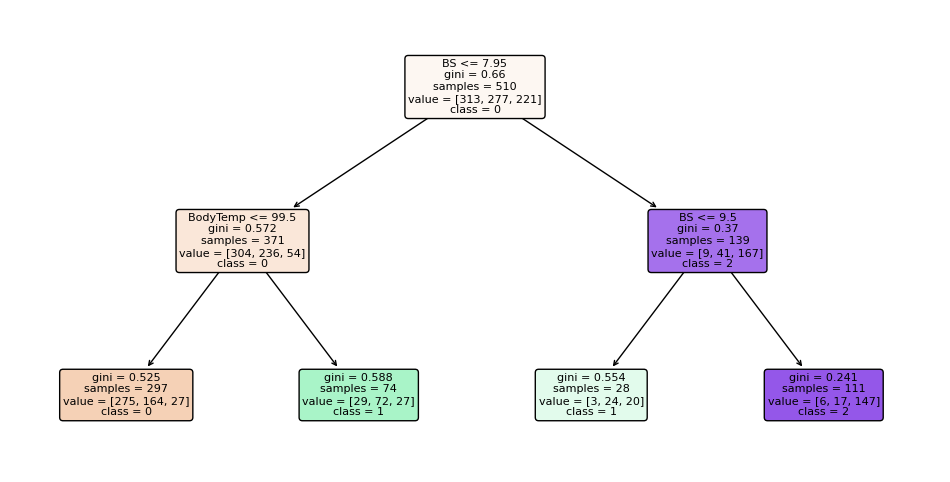

In [15]:
features = x.columns.values #The name of each column
classes = ['0','1','2']

for estimator in rfc:
    print(estimator)
    plt.figure(figsize=(12,6))
    tree.plot_tree(estimator,feature_names=features,class_names=classes,fontsize=8,filled=True,rounded=True)
    plt.show()

## Calculating the accuracy

* Precision
* Recall
* F1 score
* Confusion matrix
* Accuracy


              precision    recall  f1-score   support

           0       0.53      0.89      0.66        80
           1       0.57      0.17      0.26        76
           2       0.74      0.72      0.73        47

    accuracy                           0.58       203
   macro avg       0.61      0.59      0.55       203
weighted avg       0.59      0.58      0.53       203



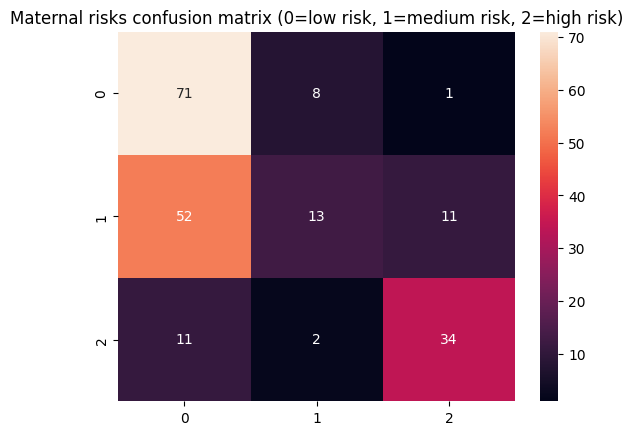

In [16]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='d').set_title('Maternal risks confusion matrix (0=low risk, 1=medium risk, 2=high risk)')
print(classification_report(y_test,y_pred))

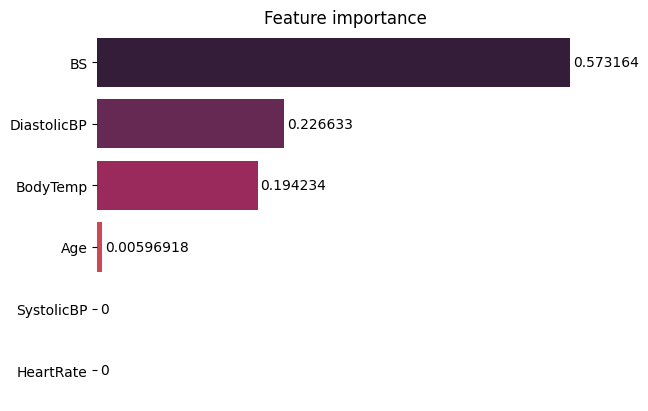

In [24]:
#Organizing feature names and importances in a DataFrame
features_df = pd.DataFrame({'features':rfc.feature_names_in_,'importances':rfc.feature_importances_})

#Sorting data from highest to lowest
features_df_sorted = features_df.sort_values(by='importances',ascending=False)

#Barplot of the result without borders and axis lines
g = sns.barplot(data=features_df_sorted,x='importances',y='features',palette='rocket')
sns.despine(bottom=True,left=True) # Remove the top and left spines from the plot.
g.set_title('Feature importance')
g.set(xlabel=None)
g.set(ylabel=None)
g.set(xticks=[])
for value in g.containers:
    g.bar_label(value,padding=2)

In [44]:
rfc = RandomForestClassifier(n_estimators=900,max_depth=7,random_state=SEED)
rfc.fit(x_train,y_train)
y_pred = rfc.predict(x_test)

              precision    recall  f1-score   support

           0    0.67647   0.86250   0.75824        80
           1    0.74576   0.57895   0.65185        76
           2    0.90476   0.80851   0.85393        47

    accuracy                        0.74384       203
   macro avg    0.77567   0.74999   0.75468       203
weighted avg    0.75527   0.74384   0.74057       203



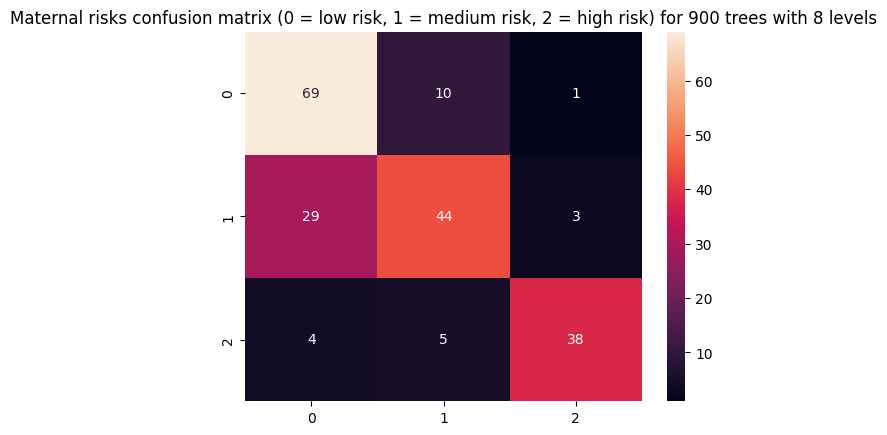

In [45]:
cm1 = confusion_matrix(y_test,y_pred)
sns.heatmap(cm1,annot=True,fmt='d').set_title('Maternal risks confusion matrix (0 = low risk, 1 = medium risk, 2 = high risk) for 900 trees with 8 levels')
print(classification_report(y_test,y_pred,digits=5))

# Regression

In [47]:
SEED = 42
y=data['BS']
x=data.drop(['BS'],axis=1)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=SEED)

In [50]:
rfr = RandomForestRegressor(n_estimators=20,max_depth=3,random_state=SEED)
rfr.fit(x_train,y_train)
y_pred = rfr.predict(x_test)

[Text(0.5, 0.875, 'RiskLevel <= 1.5\nsquared_error = 11.23\nsamples = 512\nvalue = 8.757'),
 Text(0.25, 0.625, 'Age <= 38.0\nsquared_error = 2.125\nsamples = 379\nvalue = 7.467'),
 Text(0.125, 0.375, 'HeartRate <= 84.0\nsquared_error = 0.334\nsamples = 315\nvalue = 7.188'),
 Text(0.0625, 0.125, 'squared_error = 0.272\nsamples = 287\nvalue = 7.129'),
 Text(0.1875, 0.125, 'squared_error = 0.557\nsamples = 28\nvalue = 7.798'),
 Text(0.375, 0.375, 'RiskLevel <= 0.5\nsquared_error = 9.112\nsamples = 64\nvalue = 8.98'),
 Text(0.3125, 0.125, 'squared_error = 0.921\nsamples = 32\nvalue = 7.298'),
 Text(0.4375, 0.125, 'squared_error = 11.649\nsamples = 32\nvalue = 10.524'),
 Text(0.75, 0.625, 'Age <= 29.5\nsquared_error = 18.815\nsamples = 133\nvalue = 12.497'),
 Text(0.625, 0.375, 'BodyTemp <= 102.5\nsquared_error = 4.204\nsamples = 45\nvalue = 8.512'),
 Text(0.5625, 0.125, 'squared_error = 4.245\nsamples = 40\nvalue = 8.722'),
 Text(0.6875, 0.125, 'squared_error = 0.468\nsamples = 5\nvalue = 

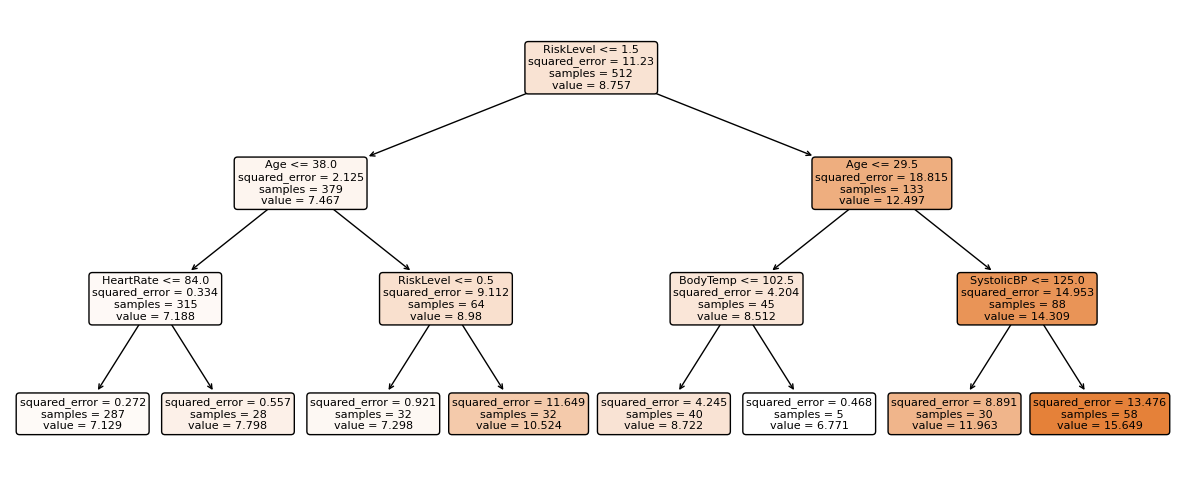

In [51]:
features = x.columns
first_tree = rfr.estimators_[0]

plt.figure(figsize=(15,6))
tree.plot_tree(first_tree,feature_names=features,fontsize=8,filled=True,rounded=True)

## Evaluation (checking accuracy)

* Mean Absolute Error(MAE)
* Mean Squared Error(MSE)
* Root Mean Squared Error(RMSE)

In [56]:
print('Mean Absolute Error:',mean_absolute_error(y_test,y_pred))
print('Mean Sqaured Error:',mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:',mean_squared_error(y_test,y_pred,squared=False))

Mean Absolute Error: 1.127893702896059
Mean Sqaured Error: 3.0802988503933326
Root Mean Squared Error: 1.755078018320933
